
### Part 1: Understanding Product Categories

- The most popular product categories on Amazon UK are "Sports & Outdoors", "Beauty", "Handmade Clothing, Shoes & Accessories", "Bath & Body", and "Birthday Gifts".
- Sports & Outdoors dominates the listings with a significantly higher frequency compared to other categories.

### Part 2: Delving into Product Pricing

- The average price of products listed on Amazon UK is £89.24, with a median price of £19.09 and a mode price of £9.99.
- There is a considerable variance in product prices, with a standard deviation of £345.61 and a range of £100,000.
- Most products fall into the "Low" price range (below £10), indicating a prevalence of lower-priced items.
- A box plot visualization shows potential outliers and the spread of product pricing.

### Part 3: Unpacking Product Ratings

- Customers generally rate products with an average rating of 2.15 stars, with a median of 0 stars and a mode of 0 stars.
- The distribution of ratings is slightly positively skewed, indicating a tendency towards higher ratings.
- The histogram shows that 0 stars is the most common rating, suggesting a significant number of negative ratings.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

/var/folders/gg/nz27bgsx0g7_fwcvbx7j9m6w0000gn/T/ipykernel_88342/3053355254.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [3]:
df = pd.read_csv("/Users/ioutlet/Downloads/amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.shape

(2443651, 9)

In [6]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [7]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('bool'), dtype('O')]

In [8]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [20]:
df.category.value_counts().sort_values(ascending=False)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [34]:
frequency_table = df.category.value_counts()

In [42]:
df_top5 = frequency_table.head(5)

In [43]:
df_top5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

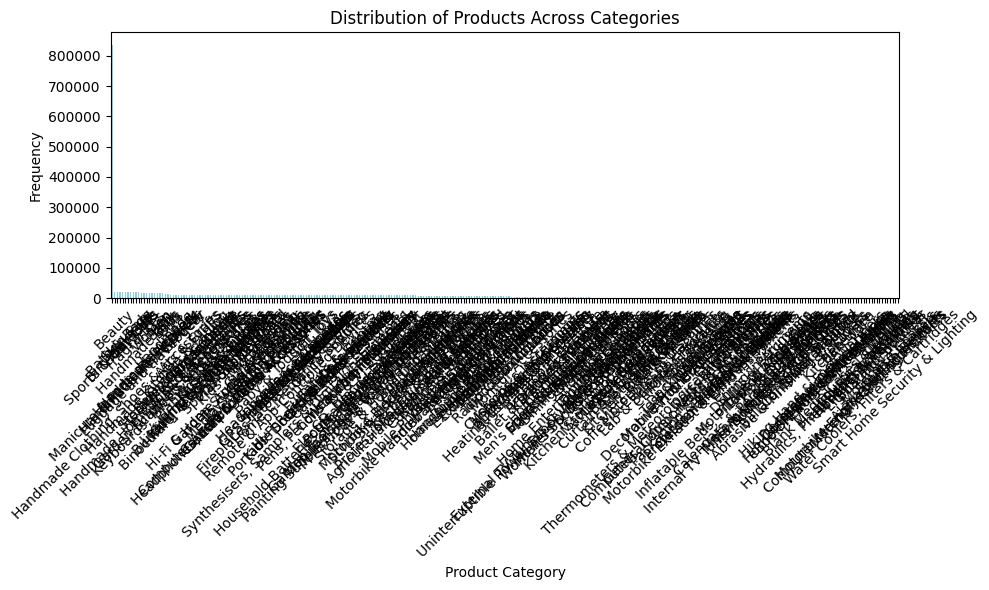

In [52]:
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

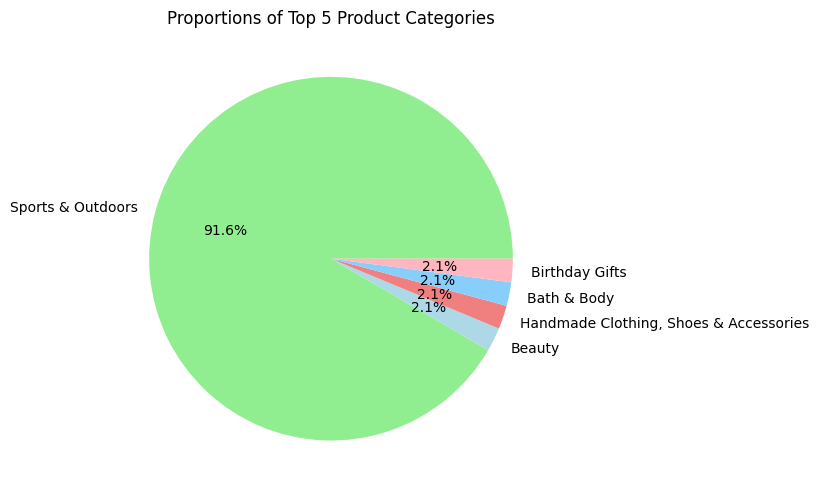

In [50]:
plt.figure(figsize=(8, 8))
df_top5.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Proportions of Top 5 Product Categories')
plt.ylabel('')
plt.tight_layout()
plt.show()

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

/var/folders/gg/nz27bgsx0g7_fwcvbx7j9m6w0000gn/T/ipykernel_88635/3053355254.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df2 = pd.read_csv("/Users/ioutlet/Downloads/amz_uk_price_prediction_dataset.csv")

In [5]:
mean_price = df2['price'].mean()
median_price = df2['price'].median()
mode_price = df2['price'].mode()[0]


mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [7]:
variance_price = df2['price'].var()
std_dev_price = df2['price'].std()
min_price = df2['price'].min()
max_price = df2['price'].max()
range_price = max_price - min_price
quantiles_price = df2['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, range_price, quantiles_price

(119445.48532254907,
 345.60886175349884,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

<Axes: xlabel='price', ylabel='Count'>

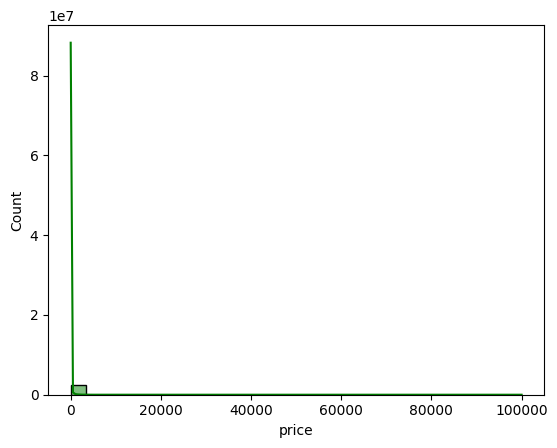

In [8]:
sns.histplot(df2['price'], kde=True, bins=30, color="green")

<Axes: ylabel='price'>

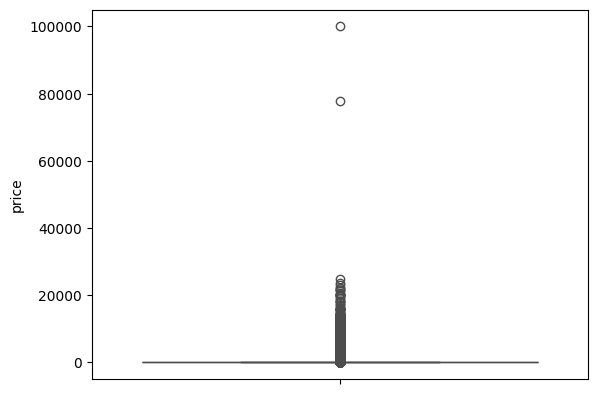

In [9]:
sns.boxplot(data = df2['price'], color="orange")

In [12]:
bins = [0, 10000, 20000, 30000, df2['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df2['pricerange'] = pd.cut(df2['price'], bins=bins, labels=labels, include_lowest=True)

In [14]:
df2.pricerange.value_counts()

pricerange
Low          2443484
Medium           154
High              11
Very High          2
Name: count, dtype: int64

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [16]:
mean_rating = df2['stars'].mean()
median_rating = df2['stars'].median()
mode_rating = df2['stars'].mode()[0]


mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

In [17]:
variance_rating = df2['stars'].var()
std_dev_rating = df2['stars'].std()
quantiles_rating = df2['stars'].quantile([0.25, 0.5, 0.75])

variance_rating, std_dev_rating, range_rating, quantiles_rating

(4.817434029796862,
 2.1948653785134207,
 100000.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [19]:
skewness_rating = df2['stars'].skew()
kurtosis_rating = df2['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

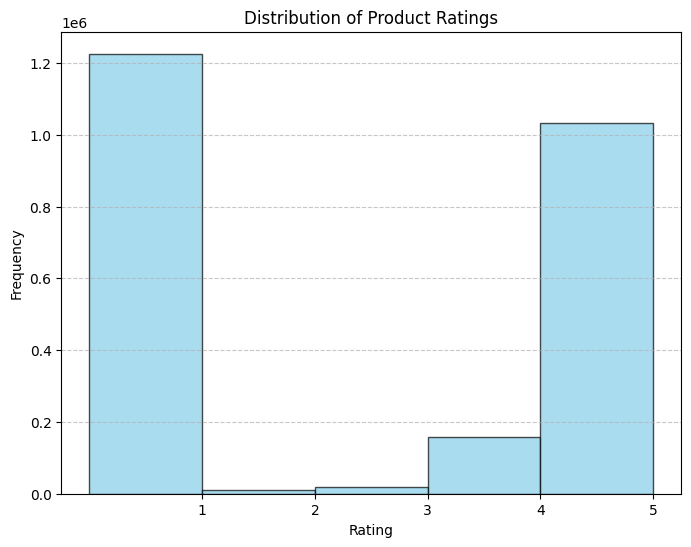

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(df2['stars'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()